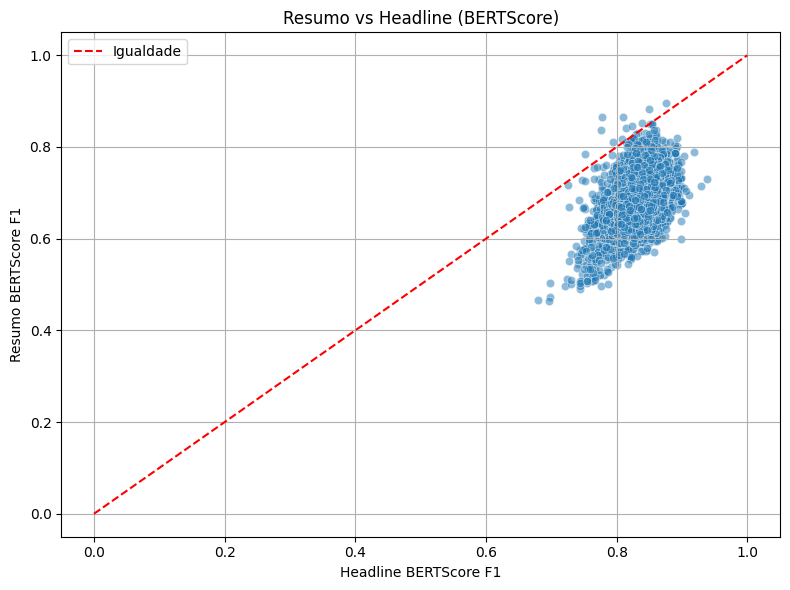

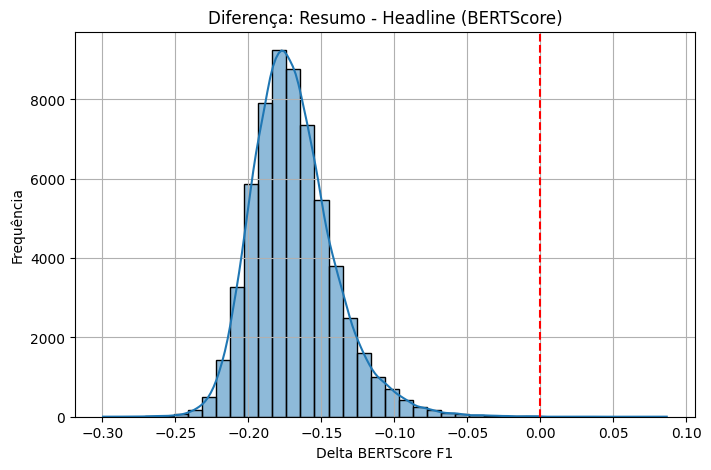

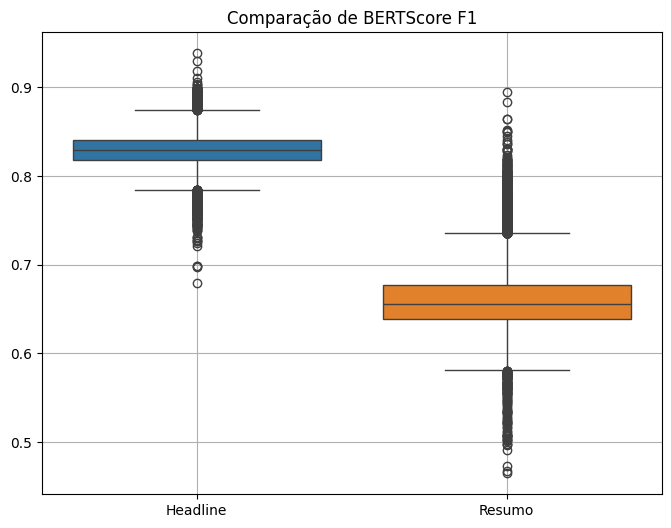

Média BERTScore Headline: 0.8297
Média BERTScore Resumo:   0.6606
% de resumos melhores que o título: 0.02%


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados
df = pd.read_csv('avaliacao_resumos_completa.csv')

# Filtrando: removendo linhas com resumo vazio ou NaN
df = df[df['resumo'].notna() & (df['resumo'].str.strip() != '')].copy()

# Convertendo colunas numéricas
metricas = ['headline_BERTScore_F1', 'resumo_BERTScore_F1',
            'headline_BLEU', 'headline_ROUGE-1', 'headline_ROUGE-2', 'headline_ROUGE-L']
df[metricas] = df[metricas].astype(float)

# Criando colunas de diferença (resumo - headline)
df['delta_BERTScore'] = df['resumo_BERTScore_F1'] - df['headline_BERTScore_F1']

# 1. Comparação com scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='headline_BERTScore_F1', y='resumo_BERTScore_F1', data=df, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--', label='Igualdade')
plt.xlabel('Headline BERTScore F1')
plt.ylabel('Resumo BERTScore F1')
plt.title('Resumo vs Headline (BERTScore)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Histograma das melhorias
plt.figure(figsize=(8, 5))
sns.histplot(df['delta_BERTScore'], bins=40, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Diferença: Resumo - Headline (BERTScore)')
plt.xlabel('Delta BERTScore F1')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# 3. Boxplots comparando diretamente as métricas
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['headline_BERTScore_F1', 'resumo_BERTScore_F1']])
plt.title('Comparação de BERTScore F1')
plt.xticks([0, 1], ['Headline', 'Resumo'])
plt.grid(True)
plt.show()

# 4. Estatísticas comparativas
media_headline = df['headline_BERTScore_F1'].mean()
media_resumo = df['resumo_BERTScore_F1'].mean()
melhorias = (df['delta_BERTScore'] > 0).mean() * 100

print(f"Média BERTScore Headline: {media_headline:.4f}")
print(f"Média BERTScore Resumo:   {media_resumo:.4f}")
print(f"% de resumos melhores que o título: {melhorias:.2f}%")


In [13]:
df.head()

,headline,title,text,resumo,classificacao,metadata,max_length,language,nivel_ensino,status,erro,headline_ROUGE-1,headline_ROUGE-2,headline_ROUGE-L,headline_BLEU,headline_BERTScore_F1,resumo_BERTScore_F1,resumo_melhor_que_headline,delta_BERTScore
1,"Calculate your budget for the wand.,\nChoose t...",How to Make a Wedding Ribbon Wand,How much money are you willing to spend on a w...,Este texto é um guia para fazer varinhas perso...,NaN,"{'tempo_processamento': 8.99620270729065, 'tam...",500,pt-BR,medio,ok,NaN,0.140187,0.049180,0.086449,0.000002,0.814617,0.618793,False,-0.195825
2,Buy or make a neat hold-all to keep everything...,How to Make a Bride Survival Kit,Ideally it should be compact and easily carrie...,Este texto fala sobre montar um kit de emergên...,NaN,"{'tempo_processamento': 5.824188232421875, 'ta...",500,pt-BR,medio,ok,NaN,0.115385,0.034335,0.076923,0.000001,0.816137,0.647328,False,-0.168809
3,Be prepared for your decision being seen by so...,How to Tell People You're Keeping Your Maiden ...,"However, traditions are not set in stone. In s...","Hoje em dia, não é mais obrigatório a mulher m...",NaN,"{'tempo_processamento': 6.02925968170166, 'tam...",500,pt-BR,medio,ok,NaN,0.160214,0.048193,0.101469,0.000107,0.822365,0.681220,False,-0.141146
4,Pick a child that is three to seven years old....,How to Ask Someone to Be Your Ring Bearer,A general rule for the ring bearer is a child ...,Para escolher a criança que vai levar as alian...,NaN,"{'tempo_processamento': 4.799262285232544, 'ta...",500,pt-BR,medio,ok,NaN,0.180288,0.089157,0.120192,0.000057,0.838326,0.646150,False,-0.192176
5,Assemble the items needed to complete the proj...,How to Wrap a Kwanzaa Gift,"These are listed below under ""Things You'll Ne...",Para embalar o presente:\n\n1. Deixe um pedaço...,NaN,"{'tempo_processamento': 2.752530574798584, 'ta...",500,pt-BR,medio,ok,NaN,0.460432,0.204380,0.273381,0.042602,0.866115,0.731230,False,-0.134885


In [14]:
len(df)

60740